In [136]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

In [137]:
#Name of the interaction files that you want to compare
#(4-times replicas of one DNMT3B-DNA complex-- CGC,CGG,CGT,CGA)

file_1="3b-cga-1-filtered.hbond"
file_2="3b-cga-2-filtered.hbond"
file_3="3b-cga-3-filtered.hbond"
file_4="3b-cga-4-filtered.hbond"

### Sim1

In [138]:
input_files = os.path.join('DNMT3B')

a=pd.read_csv(input_files+"/"+file_1, sep="\t", header=None)
a.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
a = a[a.itype != "itype"]
a['Type'] = 'sim-1'

a['resid_a'] = a['resid_a'].astype(int)
a['resid_a'] = a['resid_a'] + 570

a["resname_a"] = a["resname_a"].astype(str) + a["resid_a"].astype(str)

a=a.drop(columns=['resid_a'])

a_inter = a.loc[((a["chain_a"] == "A") & (a["chain_b"] == "B")) | ((a["chain_a"] == "A") & (a["chain_b"] == "C")) ]

a_spec = a_inter.drop(a_inter.index[a_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

a_spec_res = a_spec.drop(a_spec.index[a_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
a_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
72,hbond,A,B,ASN656,DA,291,ND2,N3,sim-1
79,hbond,A,B,ARG661,DC,290,NH2,O2,sim-1
137,hbond,A,C,ARG731,DC,298,NE,O2,sim-1
142,hbond,A,C,ARG733,DC,298,NE,N3,sim-1
144,hbond,A,C,ARG733,DC,298,NH2,O2,sim-1
...,...,...,...,...,...,...,...,...,...
210367,hbond,A,C,ARG733,DC,298,NE,N3,sim-1
210369,hbond,A,C,ARG733,DC,298,NH2,O2,sim-1
210404,hbond,A,B,LYS777,DG,285,NZ,O6,sim-1
210405,hbond,A,C,LYS777,DT,301,NZ,O4,sim-1


In [139]:
#Function for convert residue number of nucleotides to nucleotide position
def nucleotide_pos(df):
    df['resid_b'] = df['resid_b'].astype(str).str.replace('284',"(+5')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('285',"(+4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('286',"(+3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('287',"(+2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('288',"(+1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('289',"(0')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('290',"(-1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('291',"(-2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('292',"(-3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('293',"(-4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('294',"(-4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('295',"(-3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('296',"(-2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('297',"(-1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('298',"(0)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('299',"(+1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('300',"(+2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('301',"(+3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('302',"(+4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('303',"(+5)")

nucleotide_pos(a_spec_res)


In [140]:
a_spec_res['resname_a'] = a_spec_res['resname_a'].str.title()
a_spec_res['atom_pair'] = a_spec_res['resname_a']+"-"+a_spec_res['atom_a']+"-"+ a_spec_res['resid_b']+"-"+ a_spec_res['atom_b']
# of atom pairs
a_spec_res['atom_freq'] = a_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
a_spec_res=a_spec_res.sort_values(('atom_freq') , ascending=False)
a_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
76339,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-1,Arg661-NH2-(-1')-O2,799
34199,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-1,Arg661-NH2-(-1')-O2,799
34726,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-1,Arg661-NH2-(-1')-O2,799
111202,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-1,Arg661-NH2-(-1')-O2,799
167213,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-1,Arg661-NH2-(-1')-O2,799
...,...,...,...,...,...,...,...,...,...,...,...
173369,hbond,A,C,Lys785,DC,(-4),NZ,O2,sim-1,Lys785-NZ-(-4)-O2,1
36213,hbond,A,C,Asn698,DC,(0),OD1,N4,sim-1,Asn698-OD1-(0)-N4,1
107357,hbond,A,B,Asn779,DT,(+2'),ND2,O4,sim-1,Asn779-ND2-(+2')-O4,1
166483,hbond,A,C,Arg733,DC,(0),NH2,N3,sim-1,Arg733-NH2-(0)-N3,1


### Sim2

In [141]:
input_files = os.path.join('DNMT3B')

b=pd.read_csv(input_files+"/"+file_2, sep="\t", header=None)
b.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
b = b[b.itype != "itype"]
b['Type'] = 'sim-2'

b['resid_a'] = b['resid_a'].astype(int)
b['resid_a'] = b['resid_a'] + 570

b["resname_a"] = b["resname_a"].astype(str) + b["resid_a"].astype(str)

b=b.drop(columns=['resid_a'])

b_inter = b.loc[((b["chain_a"] == "A") & (b["chain_b"] == "B")) | ((b["chain_a"] == "A") & (b["chain_b"] == "C")) ]

b_spec = b_inter.drop(b_inter.index[b_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

b_spec_res = b_spec.drop(b_spec.index[b_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(b_spec_res)
b_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
72,hbond,A,B,ASN656,DA,(-2'),ND2,N3,sim-2
79,hbond,A,B,ARG661,DC,(-1'),NH1,O2,sim-2
81,hbond,A,B,ARG661,DC,(-1'),NH2,O2,sim-2
137,hbond,A,C,ARG733,DC,(0),NH2,O2,sim-2
167,hbond,A,C,LYS777,DT,(+3),NZ,O4,sim-2
...,...,...,...,...,...,...,...,...,...
212967,hbond,A,C,ARG733,DC,(0),NE,O2,sim-2
212969,hbond,A,C,ARG733,DC,(0),NH2,O2,sim-2
212999,hbond,A,C,ASN779,DG,(+1),ND2,O6,sim-2
213083,hbond,A,C,GLU697,DC,(0),OE1,N4,sim-2


In [142]:
b_spec_res['resname_a'] = b_spec_res['resname_a'].str.title()
b_spec_res['atom_pair'] = b_spec_res['resname_a']+"-"+b_spec_res['atom_a']+"-"+ b_spec_res['resid_b']+"-"+ b_spec_res['atom_b']
# of atom pairs
b_spec_res['atom_freq'] = b_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
b_spec_res=b_spec_res.sort_values(('atom_freq') , ascending=False)
b_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
179228,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-2,Arg733-NH2-(0)-O2,794
122457,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-2,Arg733-NH2-(0)-O2,794
176820,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-2,Arg733-NH2-(0)-O2,794
30348,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-2,Arg733-NH2-(0)-O2,794
30084,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-2,Arg733-NH2-(0)-O2,794
...,...,...,...,...,...,...,...,...,...,...,...
78884,hbond,A,B,Arg661,DA,(-2'),NH1,N9,sim-2,Arg661-NH1-(-2')-N9,1
4790,hbond,A,C,Asn698,DC,(0),ND2,N4,sim-2,Asn698-ND2-(0)-N4,1
177821,hbond,A,B,Asn656,DT,(-3'),ND2,O2,sim-2,Asn656-ND2-(-3')-O2,1
209853,hbond,A,C,Lys785,DC,(-4),NZ,O2,sim-2,Lys785-NZ-(-4)-O2,1


### Sim3

In [143]:
input_files = os.path.join('DNMT3B')

c=pd.read_csv(input_files+"/"+file_3, sep="\t", header=None)
c.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
c = c[c.itype != "itype"]
c['Type'] = 'sim-3'

c['resid_a'] = c['resid_a'].astype(int)
c['resid_a'] = c['resid_a'] + 570

c["resname_a"] = c["resname_a"].astype(str) + c["resid_a"].astype(str)

c=c.drop(columns=['resid_a'])

c_inter = c.loc[((c["chain_a"] == "A") & (c["chain_b"] == "B")) | ((c["chain_a"] == "A") & (c["chain_b"] == "C")) ]

c_spec = c_inter.drop(c_inter.index[c_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

c_spec_res = c_spec.drop(c_spec.index[c_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(c_spec_res)
c_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
73,hbond,A,B,ASN656,DA,(-2'),ND2,N3,sim-3
79,hbond,A,B,ARG661,DA,(-2'),NH2,N3,sim-3
80,hbond,A,B,ARG661,DC,(-1'),NH2,O2,sim-3
134,hbond,A,C,ARG733,DC,(0),NE,O2,sim-3
136,hbond,A,C,ARG733,DC,(0),NH2,O2,sim-3
...,...,...,...,...,...,...,...,...,...
211114,hbond,A,C,LYS777,DT,(+3),NZ,O4,sim-3
211115,hbond,A,B,ASN779,DT,(+2'),ND2,O4,sim-3
211116,hbond,A,C,ASN779,DG,(+1),ND2,O6,sim-3
211197,hbond,A,C,GLU697,DC,(0),OE1,N4,sim-3


In [144]:
c_spec_res['resname_a'] = c_spec_res['resname_a'].str.title()
c_spec_res['atom_pair'] = c_spec_res['resname_a']+"-"+c_spec_res['atom_a']+"-"+ c_spec_res['resid_b']+"-"+ c_spec_res['atom_b']
# of atom pairs
c_spec_res['atom_freq'] = c_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
c_spec_res=c_spec_res.sort_values(('atom_freq') , ascending=False)
c_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
127100,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-3,Arg661-NH2-(-1')-O2,800
113152,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-3,Arg661-NH2-(-1')-O2,800
115785,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-3,Arg661-NH2-(-1')-O2,800
115520,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-3,Arg661-NH2-(-1')-O2,800
115256,hbond,A,B,Arg661,DC,(-1'),NH2,O2,sim-3,Arg661-NH2-(-1')-O2,800
...,...,...,...,...,...,...,...,...,...,...,...
117445,hbond,A,B,Asn779,DA,(+3'),ND2,N7,sim-3,Asn779-ND2-(+3')-N7,1
69821,hbond,A,B,Lys828,DG,(+4'),NZ,N7,sim-3,Lys828-NZ-(+4')-N7,1
141501,hbond,A,B,Lys785,DG,(0'),NZ,N7,sim-3,Lys785-NZ-(0')-N7,1
148516,hbond,A,B,Arg823,DA,(+5'),NH1,N3,sim-3,Arg823-NH1-(+5')-N3,1


### Sim4

In [145]:
input_files = os.path.join('DNMT3B')

d=pd.read_csv(input_files+"/"+file_4, sep="\t", header=None)
d.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
d = d[d.itype != "itype"]
d['Type'] = 'sim-4'

d['resid_a'] = d['resid_a'].astype(int)
d['resid_a'] = d['resid_a'] + 570

d["resname_a"] = d["resname_a"].astype(str) + d["resid_a"].astype(str)

d=d.drop(columns=['resid_a'])

d_inter = d.loc[((d["chain_a"] == "A") & (d["chain_b"] == "B")) | ((d["chain_a"] == "A") & (d["chain_b"] == "C")) ]

d_spec = d_inter.drop(d_inter.index[d_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

d_spec_res = d_spec.drop(d_spec.index[d_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(d_spec_res)
d_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
81,hbond,A,B,ARG661,DA,(-2'),NH2,N3,sim-4
82,hbond,A,B,ARG661,DC,(-1'),NH2,O2,sim-4
134,hbond,A,C,ARG731,DC,(0),NH2,O2,sim-4
138,hbond,A,C,ARG733,DC,(0),NH2,O2,sim-4
172,hbond,A,C,ASN779,DG,(+1),ND2,O6,sim-4
...,...,...,...,...,...,...,...,...,...
213692,hbond,A,C,ARG733,DC,(0),NE,O2,sim-4
213695,hbond,A,C,ARG733,DC,(0),NH2,O2,sim-4
213726,hbond,A,C,LYS777,DT,(+3),NZ,O4,sim-4
213728,hbond,A,C,ASN779,DG,(+1),ND2,O6,sim-4


In [146]:
d_spec_res['resname_a'] = d_spec_res['resname_a'].str.title()
d_spec_res['atom_pair'] = d_spec_res['resname_a']+"-"+d_spec_res['atom_a']+"-"+ d_spec_res['resid_b']+"-"+ d_spec_res['atom_b']
# of atom pairs
d_spec_res['atom_freq'] = d_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
d_spec_res=d_spec_res.sort_values(('atom_freq') , ascending=False)
d_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
80648,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-4,Arg733-NH2-(0)-O2,792
95909,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-4,Arg733-NH2-(0)-O2,792
59863,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-4,Arg733-NH2-(0)-O2,792
45172,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-4,Arg733-NH2-(0)-O2,792
186976,hbond,A,C,Arg733,DC,(0),NH2,O2,sim-4,Arg733-NH2-(0)-O2,792
...,...,...,...,...,...,...,...,...,...,...,...
201750,hbond,A,B,Asn779,DC,(+1'),OD1,N4,sim-4,Asn779-OD1-(+1')-N4,1
178021,hbond,A,B,Lys828,DG,(+4'),NZ,N7,sim-4,Lys828-NZ-(+4')-N7,1
161444,hbond,A,C,Lys777,DC,(+4),NZ,N4,sim-4,Lys777-NZ-(+4)-N4,1
178941,hbond,A,B,Asn656,DT,(-3'),ND2,O2,sim-4,Asn656-ND2-(-3')-O2,1


## Merge and compare

In [147]:
sims = [a_spec_res, b_spec_res, c_spec_res, d_spec_res]
cpg_comp = pd.concat(sims)

In [148]:
cpg_comp_compl = cpg_comp[cpg_comp['resid_b'].isin(("(0')","(+5')","(+4')","(+3')","(+2')","(+1')"
                                                              ,"(-1')","(-2')","(-3')","(-4')"))]



cpg_comp_target = cpg_comp[cpg_comp['resid_b'].isin(("(0)","(+5)","(+4)","(+3)","(+2)","(+1)",
                                                       "(-1)","(-2)","(-3)","(-4)"))]


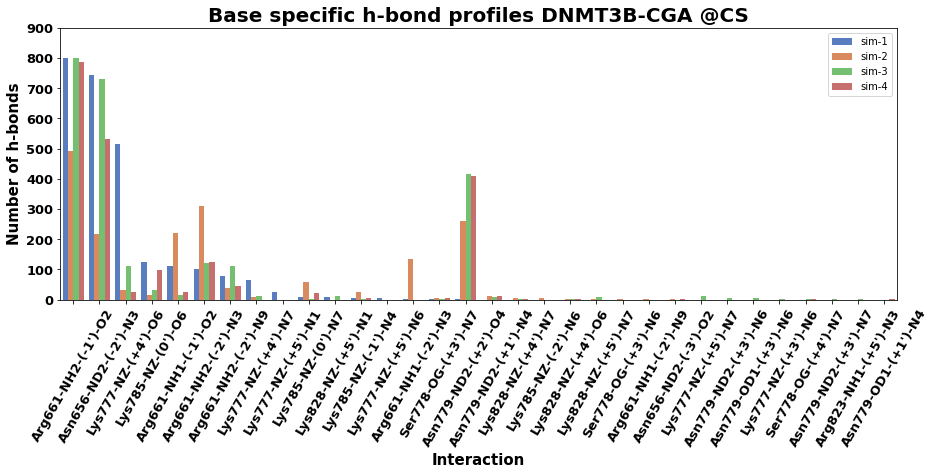

In [149]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

plt.figure(figsize=(15,5))
ax = sns.barplot(x="atom_pair", y="atom_freq", hue="Type", palette="muted", data=cpg_comp_compl)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(ymax = 900, ymin = 0)
plt.xlabel('Interaction', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=15, fontweight='bold')
plt.title("Base specific h-bond profiles DNMT3B-CGA @CS",fontsize=20, fontweight='bold')

plt.savefig("3b-cga-comp-atom-C.pdf", dpi=600, bbox_inches='tight', format="pdf")

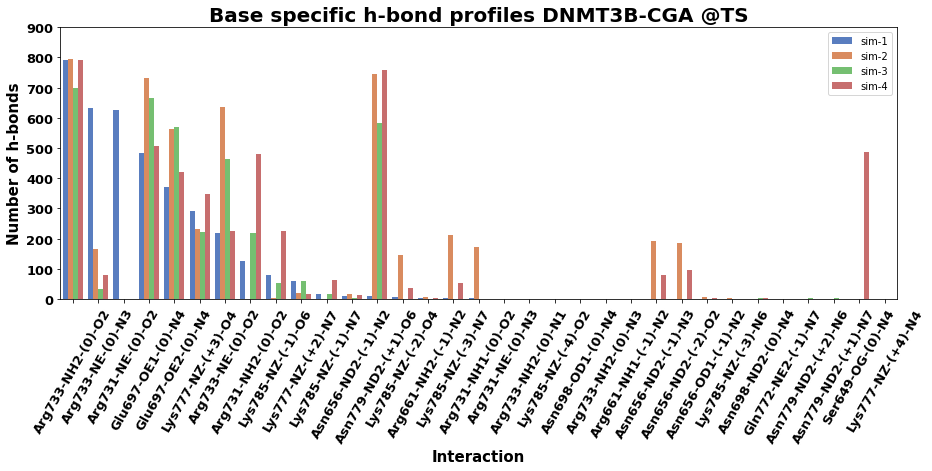

In [150]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

plt.figure(figsize=(15,5))
ax = sns.barplot(x="atom_pair", y="atom_freq", hue="Type", palette="muted", data=cpg_comp_target)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(ymax = 900, ymin = 0)
plt.xlabel('Interaction', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=15, fontweight='bold')
plt.title("Base specific h-bond profiles DNMT3B-CGA @TS",fontsize=20, fontweight='bold')

plt.savefig("3b-cga-comp-atom-T-f.pdf", dpi=600, bbox_inches='tight', format="pdf")